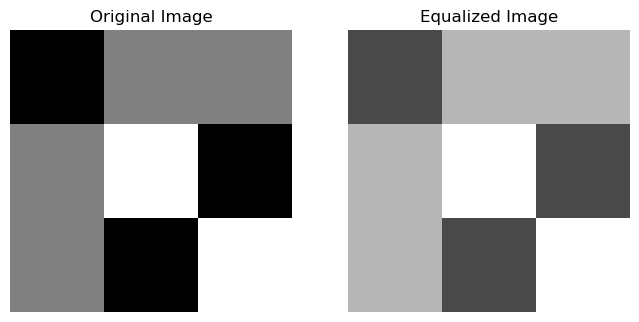

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Original 3-bit image
image1 = np.array([[0, 1, 1],
                  [1, 2, 0],
                  [1, 0, 2]])

# Calculate histogram
hist, _ = np.histogram(image1.flatten(), bins=[0, 1, 2, 3], density=False)

# Calculate cumulative distribution function (CDF)
cdf = hist.cumsum()

# Normalize CDF using maximum value for a 3-bit image
max_value = 7
normalized_cdf = np.round((cdf / cdf[-1]) * max_value).astype(int)

# Map the original pixel values to new values
equalized_image = normalized_cdf[image1]

# Plot original and equalized images
plt.figure(figsize=(8, 4))

plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(image1, cmap='gray', vmin=0, vmax=2)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title("Equalized Image")
plt.imshow(equalized_image, cmap='gray', vmin=0, vmax=7)
plt.axis('off')

plt.show()


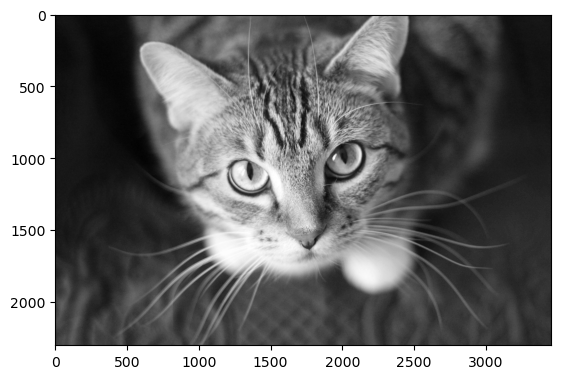

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image in grayscale
image = cv2.imread('pexels-kmerriman-20787.jpg', cv2.IMREAD_GRAYSCALE)
#show the image
plt.imshow(image, cmap='gray')


In [2]:
#check data type and maximum value
image.dtype
image.max()

255

<BarContainer object of 256 artists>

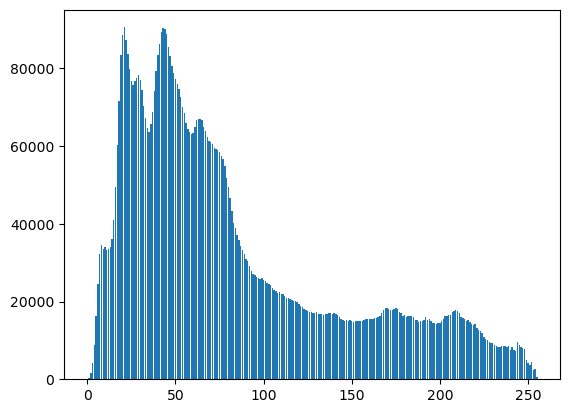

In [3]:
#plot historgram
f = np.zeros(256)
for i in range(256):
    f[i] = np.sum(image == i)
plt.bar(np.arange(256), f)

256


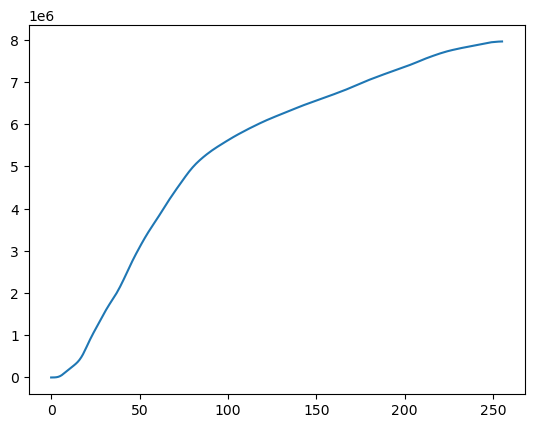

In [4]:
cf = np.cumsum(f)
print(len(cf))
plt.plot(np.arange(256), cf)

In [5]:
np.prod(image.shape)

7962624

In [6]:
cf

array([1.510000e+02, 5.580000e+02, 2.055000e+03, 6.278000e+03,
       1.515200e+04, 3.132200e+04, 5.573500e+04, 8.797100e+04,
       1.224380e+05, 1.558370e+05, 1.897830e+05, 2.230110e+05,
       2.565850e+05, 2.905770e+05, 3.266750e+05, 3.675760e+05,
       4.170190e+05, 4.773020e+05, 5.489440e+05, 6.323580e+05,
       7.209490e+05, 8.114730e+05, 8.987170e+05, 9.824950e+05,
       1.062249e+06, 1.138877e+06, 1.214509e+06, 1.291252e+06,
       1.368815e+06, 1.446945e+06, 1.523922e+06, 1.598211e+06,
       1.668612e+06, 1.735933e+06, 1.800458e+06, 1.864140e+06,
       1.929668e+06, 1.998408e+06, 2.072625e+06, 2.151784e+06,
       2.235119e+06, 2.321433e+06, 2.410870e+06, 2.501313e+06,
       2.591379e+06, 2.680117e+06, 2.765490e+06, 2.848556e+06,
       2.929115e+06, 3.007787e+06, 3.085097e+06, 3.160916e+06,
       3.235446e+06, 3.308052e+06, 3.378101e+06, 3.446682e+06,
       3.512531e+06, 3.576969e+06, 3.640476e+06, 3.703575e+06,
       3.766925e+06, 3.831719e+06, 3.898317e+06, 3.9653

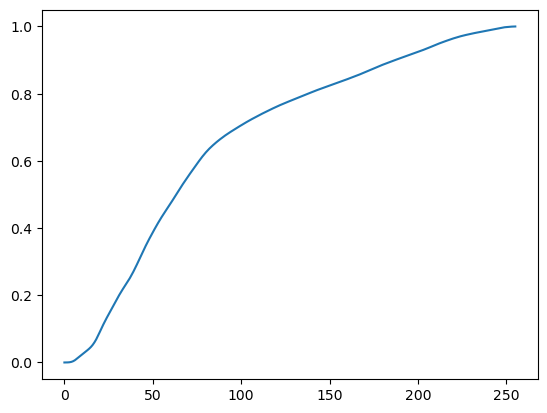

In [7]:
cf /= np.prod(image.shape)
plt.plot(np.arange(256), cf)

In [8]:
mapping = np.round(cf * 255)
mapping = mapping.astype(np.uint8)
mapping


array([  0,   0,   0,   0,   0,   1,   2,   3,   4,   5,   6,   7,   8,
         9,  10,  12,  13,  15,  18,  20,  23,  26,  29,  31,  34,  36,
        39,  41,  44,  46,  49,  51,  53,  56,  58,  60,  62,  64,  66,
        69,  72,  74,  77,  80,  83,  86,  89,  91,  94,  96,  99, 101,
       104, 106, 108, 110, 112, 115, 117, 119, 121, 123, 125, 127, 129,
       131, 133, 135, 137, 139, 141, 143, 145, 147, 149, 151, 153, 154,
       156, 158, 159, 161, 162, 164, 165, 166, 167, 168, 169, 170, 171,
       172, 173, 174, 175, 176, 177, 178, 178, 179, 180, 181, 182, 182,
       183, 184, 185, 185, 186, 187, 188, 188, 189, 190, 190, 191, 192,
       192, 193, 194, 194, 195, 195, 196, 196, 197, 198, 198, 199, 199,
       200, 200, 201, 201, 202, 202, 203, 204, 204, 205, 205, 206, 206,
       207, 207, 208, 208, 209, 209, 210, 210, 211, 211, 212, 212, 213,
       213, 214, 214, 215, 215, 216, 216, 217, 217, 218, 218, 219, 219,
       220, 220, 221, 221, 222, 223, 223, 224, 224, 225, 225, 22

In [9]:
B = image.copy()
for i in range(256):
  B[image==i] = mapping[i]

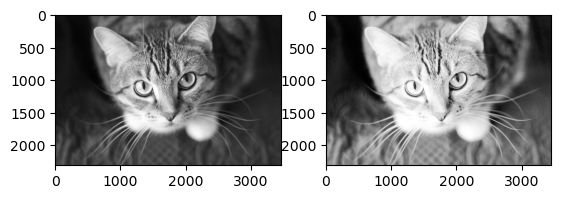

In [10]:
plt.subplot(1,2,1); plt.imshow(image, cmap='gray')
plt.subplot(1,2,2); plt.imshow(B, cmap='gray')

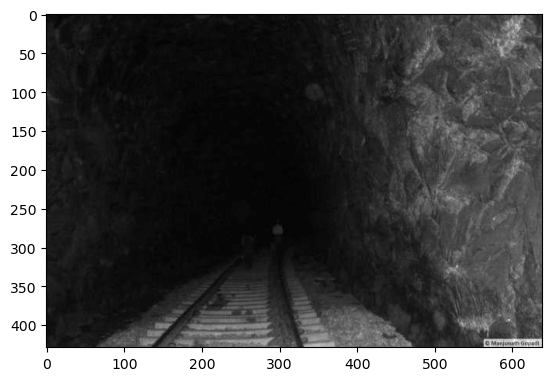

In [7]:
# Load the image in grayscale
T = cv2.imread('tunnel.jpg', cv2.IMREAD_GRAYSCALE)
#show the image
plt.imshow(T, cmap='gray')

In [7]:
import cupy as cp

def histgrameqaulication(input):
    input = cp.asarray(input)
    f = cp.zeros(256)
    for i in range(256):
        f[i] = cp.sum(input == i)
    cf = cp.cumsum(f)
    cf /= cp.prod(input.shape)
    mapping = cp.round(cf * 255).astype(cp.uint8)
    output = input.copy()
    for i in range(256):
        output[input == i] = mapping[i]
    return cp.asnumpy(output)

ModuleNotFoundError: No module named 'cupy'

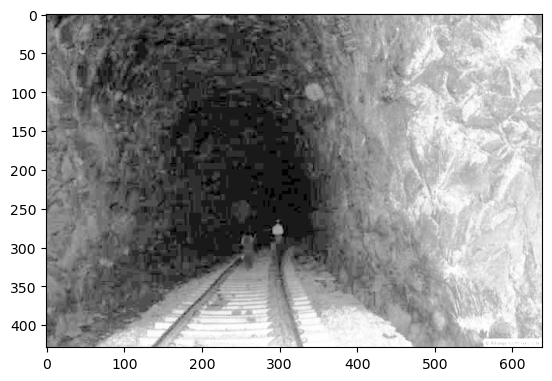

In [9]:
histgrameqaulication(T)
plt.imshow(histgrameqaulication(T), cmap='gray')

In [12]:
kernel = 2
stride = 1
for i in range(0, T.shape[0], stride):
    for j in range(0, T.shape[1], stride):
        T[i:i+kernel, j:j+kernel] = histgrameqaulication(T[i:i+kernel, j:j+kernel])

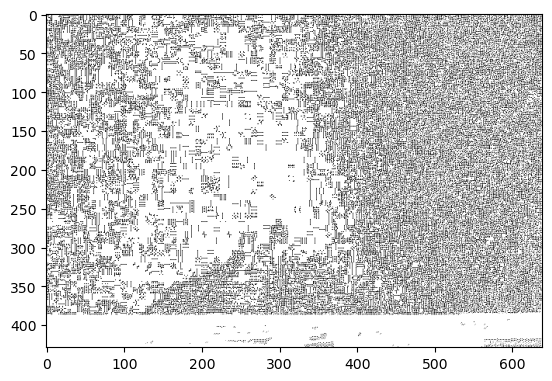

In [13]:
plt.imshow(T, cmap='gray')